# Tarea 3.1: "GAIA"

### 1.-

GAIA (Graphical Astronomy and Image Analysis) es un observatorio espacial de la ESA (Agencia Espacial Europea) diseñado para hacer astrometría. La misión en sí consiste en construir el más largo y más preciso catálogo en 3D con aproximadamente 1 billon de objetos astronómicos de la Via Lactea. También se espera detectar miles de exoplanetas del tamaño de Jupiter fuera del Sistema Solar y miles de asteroides y cometas dentro de éste.

El objetivo final de la misión GAIA es mapear los movimientos de los objetos de la Vía Lactea que ayudarán para explicar el origen y evolución de nuestra galaxia.

Los primeros datos recibidos desde GAIA fue el 14 de septiembre del 2016.

Fuentes:
> https://en.wikipedia.org/wiki/Gaia_%28spacecraft%29

> http://sci.esa.int/gaia/

### 2.-

RAVE (RAdial Velocity Experiment) es un surveys espectroscópico que como tal, contiene datos que se pueden obetner de una espectroscopía, como la temperatura efectiva, gravedad superficial, velocidades radiales y abundancias químicas de atmósferas estelares.

Otros catálogos existentes son TGAS y APOGEE, en el cual se complementan con el RAVE. Ahora RAVE-on es el catálogo con los mismo datos de RAVE pero mejorados, y junto con TGAS son los más dominantes para esta misión.

Fuentes:
> https://arxiv.org/pdf/1609.02914v1.pdf

> Lo discutido en la clases del miércoles.

### 3.-

En esta parte me introduje al siguiente github; https://github.com/andres-jordan/gaia_tools y luego seleccioné la opción _clone or download_ en el cual me descargó un archivo.zip. Luego extraje el contenido del archivo y en la terminal instalé _setup.py_ con el siguiente comando; _sudo python setup.py install_. Posteriormente, instalé el módulo _fitsio_ con el siguiente comando; _pip install fitsio_. Finalmente definí el ambiente de nombre GAIA_TOOLS_DATA de la siguiente manera; colcando __export GAIA_TOOLS_DATA=/home/juanito/Documento/Experimental/TAREA3-1/gaia_tools-master__  en la terminal. 



### 4.-

Para descargar los catálogos __TGAS__ y __RAVE-ON__ hize lo siguiente:


In [1]:
import gaia_tools.load as gload
tgas_cat = gload.tgas() #Obtengo el catálogo TGAS
raveon_cat = gload.raveon() #Obtengo el catálogo RAVE-ON



### 5.-

Para determinar la estructura de cada catálogo fue importante revisar los archivos.fits en el cual para TGAS y para RAVE-ON contenian 2 extensiones. los catálogos se encontraban en la segunda extesión. 
Entonces, a continuación están los header que me indicarán los datos que contiene cada catálogo y también conoceré su organización.


In [2]:
from astropy.io import fits
Im=fits.open('TgasSource_000-000-000.fits','readonly')
Im[1].header
#Im[1].data


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional table                            
NAXIS1  =                  336 / width of table in bytes                        
NAXIS2  =               134865 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group                                 
TFIELDS =                   59 / number of columns                              
EXTNAME = 'TgasSource_000-000-000.fits' / table name                            
TTYPE1  = 'hip     '           / label for column 1                             
TFORM1  = 'J       '           / format for column 1                            
TNULL1  =          -2147483648 / blank value for column 1                       
TUCD1   = 'meta.id.cross'   

Este catálogo contiene principalmente posiciones estelares, paralajes y magnitudes, luego junto con Hipparcos agregaron movimientos propios. Observando el header y la página http://dc.zah.uni-heidelberg.de/__system__/dc_tables/show/tableinfo/tgas.main super como estaba estructurado el catálogo. Notar que usé como ejemplo el primer archivo.fits de los que descargué ateriormente.

Este catálogo contiene 59 columnas en donde las primeras 4 columnas correponden al identificador (nombre) del objeto observado (Hip, tycho2, source, solution), la columna 6 entrega la época de referencia en el que se registraron los parametros astrometricos de la fuente (en años julianos), de la columna 7 al 10 se encuentras las coordenadas de asención recta y declinació, 11 y 12 paralaje, del 13 al 16 movimientos propios tanto en declinación como en asención recta, de la columna 17 a la 26 correlaciones entre asención recta y declinacion, movimientos propios en RA y DEC, paralaje y viceversa, también hay una correlacion entre movimientos propios en DEC y en RA. De la 27 a la 40 están los datos de astrometría, la columnda 51 contiene el número de observaciones que constribuyo para obtener el flujo y su error en el fliltro _G_, 52 y 53 se encuentran los flujos y errores correspondientes, en la banda G, en la columnda 54 estan las magnitudes G, en las 56 y 57 se encuentran las coordenadas galácticas (longitud y latitud respectivamente) y en la 58 y 59 se encuentran las coordenadas eclípticas (longitud y latitud respectivamente).  


In [3]:
############ Observaré el header del catálogo RAVE-ON #################
print("_____________________________________________________________________________________________________________")
Im1=fits.open('RAVE-on-v1.0.fits','readonly')
Im1[1].header

_____________________________________________________________________________________________________________


XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  344 / length of dimension 1                          
NAXIS2  =               520701 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   58 / number of table fields                         
TTYPE1  = 'RAVE_OBS_ID'                                                         
TFORM1  = '31A     '                                                            
TTYPE2  = 'RAVEID  '                                                            
TFORM2  = '16A     '                                                            
TTYPE3  = 'RA      '        

Observando el header y la siguiente página https://www.rave-survey.org/project/documentation/dr5/rave_on/ noto que el catálogo es una tabla en 2D que contiene 59 columnas, al igual que TGAS.

Los datos que se encuentran en las columnas son; el identificador del objeto, dia de observación, nombre del campo de observación y el número, esto en la columna 1, en la columna 2 está el nombre, 3 y 4 RA y DEC (en grados) respectivamente, de la 5 a la 15 están los datos de la velocidad radia heliocéntrica (HRV) como el error, desviación estandar, media, la corrección de peso y de anchura, la correción del zero point aplicado al HRV. En la columnda 16, está la velocidad de rotación (todas estas medidas de velocidad estan en km/s), de la 18 a la 37 hay coeficientes del mínimo de distancia a la base del espectro dado, luego, de la 38 a la 46 se encuentran los datos de temperatura efectviva, gravedad superficial (log g), metalicidad, abundancia de oxígeno, magnesio, aluminio, silicio, calcio y niquel respectivamente. De la 47 a la 56 estan los respectivos errores de los datos previos. En la 57 está la razón de señal sobre ruido, y en la 58 y 59 están el error de mínimos cuadrados y el quality flag.  


### 6.- 

A continuación haré el match entre los dos catálogos (TGAS y RAVE-ON)

Populating the interactive namespace from numpy and matplotlib


/home/juanito/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['nan']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


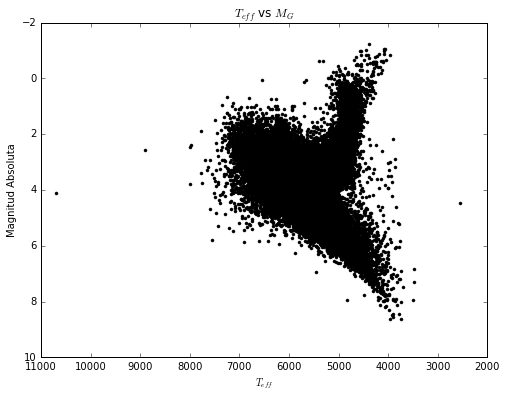

In [5]:
from gaia_tools import xmatch
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

n1,n2,separacion=xmatch.xmatch(raveon_cat,tgas_cat,colRA1='RA',colDec1='DEC',epoch1=2015.,colRA2='ra',colDec2='dec',epoch2=2015.,colpmRA2='pmra',colpmDec2='pmdec')

#hago valer la condición de seña a ruido > 10
validacion=(tgas_cat[n2]['parallax'] / tgas_cat[n2]['parallax_error']) > 10
n1=n1[validacion]
n2=n2[validacion] #Aquí se le dan nos nuevos índices con una señal a ruide > 10

TEFF=[]
MG=[]

T=raveon_cat[n1]['TEFF']
#en el catálogo tgas el paralaje está en mili arcosegundos por lo que del logaritmo aparece un termino -15 por lo  que tengo lo siguiente.
MGabs=tgas_cat[n2]['phot_g_mean_mag']+5+5*np.log10(tgas_cat[n2]['parallax'])-15 #Estoy transformando de magnitud aparente a absoluta.

#Procederé a eliminar los nan.

nan=np.isnan(T) + np.isnan(MGabs)

TEFF.append(T[~nan])
MG.append(MGabs[~nan])

plt.subplots(figsize=(8,6))
for i in range(len(TEFF)):
    plt.plot(TEFF[i],MG[i],'k.')
    plt.gca().invert_xaxis() 
    plt.gca().invert_yaxis() 
    plt.title("$T_{eff}$ vs $M_G$")
    plt.xlabel("$T_{eff}$")
    plt.ylabel("Magnitud Absoluta")
    
plt.show()

TypeError: 'AxesSubplot' object does not support indexing

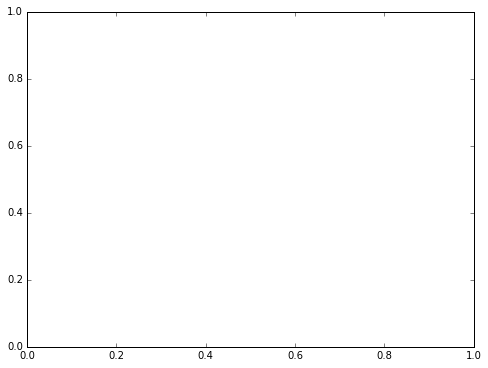

In [16]:
#Diagrama de Hess
######### Para esta parte utilicé el código que aparece en la siguiente pagina: http://www.astroml.org/examples/datasets/plot_SDSS_SSPP.html ##############

#Primero, defino las variables limpias de nan.
from scipy.stats import gaussian_kde
x=T[~nan]
y=MGabs[~nan]

fig, ax1 = plt.subplots(1, figsize=(8, 6))


H, ejex, ejey = np.histogram2d(x, y, bins=100)
H = np.rot90(H)
H = np.flipud(H)

im = ax1[0].pcolormesh(ejex, ejey)
ax1[0].set_xlabel('$T_{eff}$', fontsize=15)
ax1[0].set_ylabel('$M_G$', fontsize=15)
fig.colorbar(im, ax=ax1[0])
ax1[0].set_ylim((-2, 10))
ax1[0].set_xlim((3000, 8000))
ax1[0].set_title("Diagrama de Hess")
ax1[0].invert_xaxis()
ax1[0].invert_yaxis()
plt.show()

#Intento de diagrama de hess

Es difícil notar las estructuras de una diagrama HR para este caso, debido aque estamos graficando muchas poblaciones estelares juntas. Aún así, es posible apreciar la secuancia principal, junto con la rama horizontal, y en el extremo superior derecho se puede apreciar la rama de las gigantes rojas. Sin embargo es imposible apreciar exactamente el turn off, pero si se logra ver el cambio cuando las estrellas comienzan a quemar helio. También es dificil notar las enanas blancas.

### 7.-

A continuación programaré la relacion entre las velocidades físicas en las coordenadas galácticas con los observables que aparecen en paper http://iopscience.iop.org/article/10.1088/0004-637X/700/2/1794/pdf.

In [7]:
from astropy import units as u
from astropy.coordinates import SkyCoord

#Función que recibirá todos los observables que aparecen en el paper ya mencionado anteriormente,
#y me devolverá el vector con las velocidades en las coordenadas galacticas.

def V_velocidades(vr,paralaje,mu_a,mu_d,ra,dec):
    
    k=4.74047 #factor para pasar a Km/s 
    
    #ahora defino el centro de las galaxia, pero dependiendo del polo norte galáctico.
    cen_gal=SkyCoord('12h51m26.282s', '+27d07m42.01s', frame='icrs') #las coordenandas del polo norte galáctico las saqué de: https://es.wikipedia.org/wiki/Coordenadas_gal%C3%A1cticas
    ra_NGP=cen_gal.ra.radian 
    dec_NGP=cen_gal.dec.radian
    theta=np.radians(123) 
    
    #Ahora definiré las matrices de T
    t1=np.matrix([[np.cos(theta),np.sin(theta),0],[np.sin(theta),-np.cos(theta),0],[0,0,1]])
    t2=np.matrix([[-np.sin(dec_NGP),0,np.cos(dec_NGP)],[0,1,0],[np.cos(dec_NGP),0,np.sin(dec_NGP)]])
    t3=np.matrix([[np.cos(ra_NGP),np.sin(ra_NGP),0],[-np.sin(ra_NGP),np.cos(ra_NGP),0],[0,0,1]])
    
    #Ahora definiré las matrices de A
    a1=np.matrix([[np.cos(ra),-np.sin(ra),0],[np.sin(ra),np.cos(ra),0],[0,0,1]])
    a2=np.matrix([[np.cos(dec),0,-np.sin(dec)],[0,1,0],[np.sin(dec),0,np.cos(dec)]])
    
    #Ahora el vector que contiene los observables
    vector=np.array([vr,k/paralaje*mu_a*np.cos(dec),k/paralaje*mu_d])
    
    T=t1*t2*t3
    A=a1*a2
    
    #Ahora calculo el vector de las velocidades en las coordenadas galacticas.
    V=np.dot(T*A,vector)
    return V


In [9]:
#Ahora definiré los observables.

Vr=raveon_cat[n1]['HRV']
ra=np.radians(raveon_cat[n1]['RA'])  
dec=np.radians(raveon_cat[n1]['DEC'])
paralaje=tgas_cat[n2]['parallax']/1000
mu_a=tgas_cat[n2]['pmra']/1000
mu_d=tgas_cat[n2]['pmdec']/1000

v_x=[]
v_y=[]
for i in range(len(ra)): #ó len(dec)
    V=V_velocidades(Vr[i],paralaje[i],mu_a[i],mu_d[i],ra[i],dec[i])  
    v_x.append(float(V[0,0]))
    v_y.append(float(V[0,1]))
    


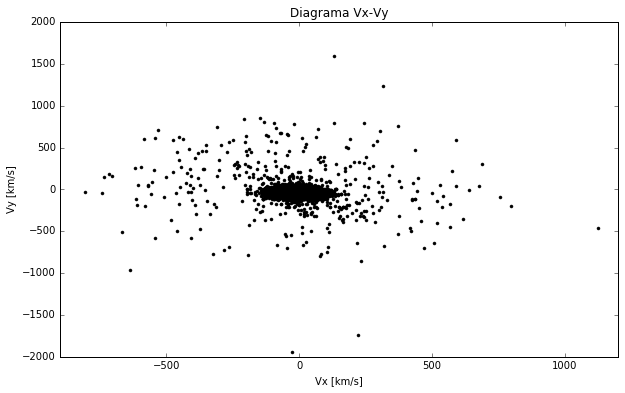

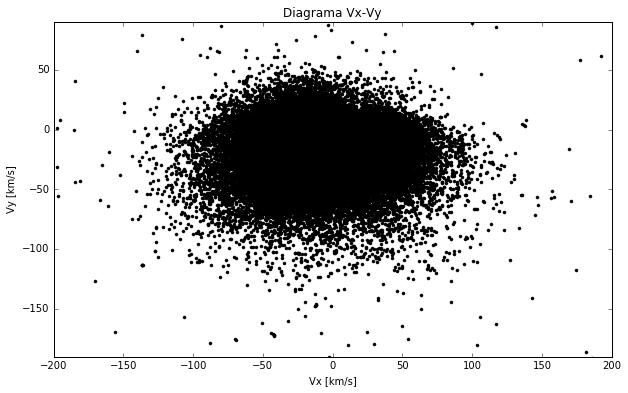

In [10]:
#Realizando el diagrama tengo Vx-Vy:

plt.subplots(figsize=(10,6))
for i in range(len(ra)):
    plt.plot(v_x[i],v_y[i],'k.')
    #plt.gca().invert_xaxis() 
    #plt.gca().invert_yaxis() 
    plt.title("Diagrama Vx-Vy")
    plt.xlabel("Vx [km/s]")
    plt.ylabel("Vy [km/s]")
    plt.xlim(-900,1200)
plt.show()

#Zoomeando

plt.subplots(figsize=(10,6))
for i in range(len(ra)):
    plt.plot(v_x[i],v_y[i],'k.')
    #plt.gca().invert_xaxis() 
    #plt.gca().invert_yaxis() 
    plt.title("Diagrama Vx-Vy")
    plt.xlabel("Vx [km/s]")
    plt.ylabel("Vy [km/s]")
    plt.xlim(-200,200)
    plt.ylim(-190,90)
plt.show()


Es esperable de que el diagrama esté "centrado" en cero ya que son objetos de la galaxia y estos no deberían variar con respecto a su sistema de referencia (ya que se usó coordenadas galácticas). Otra observación es el alargamiento en el eje x lo que implica una dinámica de la galaxia.

Hipparcos (HIgh Precision Parallax COllecting Satellite) es un un satélite de la ESA en el cual fue lanzado en 1989 y fue operado hasta 1993. Fue el primero en usar astrometría, lo cual fue importante porque se determinó con precisión los movimientos propios y paralajes de las estrellas, permitiendo así, determinar sus distancias y velocidades tangenciales. Combinando estos datos con los espectroscópicos, se formó el catálogo de Hipparcos con una alta precisión (tiene cerca de 118200 estrellas)

Fuente: 
> https://en.wikipedia.org/wiki/Hipparcos